In [1]:
import pandas as pd
import numpy as np

In [2]:
%matplotlib inline
%pylab inline
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

Populating the interactive namespace from numpy and matplotlib


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **CARREGAMENTO DOS DADOS - Dados CNPJ EMPRESA**

A finalidade deste notebbok é a concatenação, no dataset CNPJ das demais informações contidas nos outros arquivos. Ao final, o dataset CNPJ terá todas as informações para realizarmos a análise e exploração dos dados.

In [4]:
cnpj_final = pd.read_csv('/content/drive/MyDrive/TCC - PUC/cnpj_final.csv',encoding='ISO-8859-1', sep=';' ,dtype=str, header=0)


# **DATASET SIAFI**

Neste dataset iremos buscar as informações do "Código Município SIAFI", código utilizado pela Receita Federal do Brasil para identificar o Município na tabela de Dados Públicos de CNPJ. Como os demais dataset´s utilizam o "Código IBGE" para referenciar o município, utilizaremos este dataset SIAFI para fazer a relação das duas colunas: "Código Município SIAFI" x "Código IBGE" e incluiremos a coluna "Código IBGE" no dataset CNPJ.

------------


https://www.tesourotransparente.gov.br/ckan/dataset/lista-de-municipios-do-siafi




In [5]:
municipios_siafi = pd.read_csv('//content/drive/MyDrive/TCC - PUC/TABELA DE MUNICÍPIOS DO SIAFI.csv',encoding='ISO-8859-1', sep=';' ,dtype=str, header=0,decimal=',')

In [6]:
municipios_siafi.columns = ['codigo_municipio_siafi', 'cnpj_base', 'descricao_municipio', 'uf','codigo_ibge']

In [7]:
municipios_siafi.shape

(5589, 5)

In [8]:
municipios_siafi.dtypes

codigo_municipio_siafi    object
cnpj_base                 object
descricao_municipio       object
uf                        object
codigo_ibge               object
dtype: object

In [9]:
municipios_siafi.head()

,codigo_municipio_siafi,cnpj_base,descricao_municipio,uf,codigo_ibge
0,1,"5,89363E+12",GUAJARA-MIRIM,RO,1100106
1,2,"8,4745E+13",ALTO ALEGRE DOS PARECIS,RO,1100379
2,3,"5,90313E+12",PORTO VELHO,RO,1100205
3,8,"8,47369E+13",CUJUBIM,RO,1100940
4,13,"4,09271E+12",VILHENA,RO,1100304


In [10]:
codigo_ibge_ajustado = municipios_siafi['codigo_ibge'].map(lambda x: str(x)[:-1]) #Criação da coluna codigo_ibge_ajustado para possibilitar a concatenação com a tabela covid_brasil pois a mesma não possui o digito verificador na coluna

In [11]:
municipios_siafi = pd.concat([municipios_siafi, codigo_ibge_ajustado], axis=1) # concatenação do código IBGE sem dígito verificador

In [12]:
municipios_siafi['codigo_municipio_siafi'] = municipios_siafi['codigo_municipio_siafi'].astype(int)
cnpj_final['codigo_municipio_siafi'] = cnpj_final['codigo_municipio_siafi'].astype(int)

In [13]:
municipios_siafi.columns = ['codigo_municipio_siafi', 'cnpj_base', 'descricao_municipio', 'uf','codigo_ibge', 'codigo_ibge_ajustado']

In [14]:
municipios_siafi = municipios_siafi.drop(['cnpj_base','uf'], axis=1) #eliminação das colunas desnecessárias/redundantes

In [15]:
cnpj_final = pd.merge(cnpj_final, municipios_siafi, how='left', on='codigo_municipio_siafi') # concatenação dos dataset´s pelo codigo_municipio_siafi

# **DATASET COVID**

Dados obtidos no site do Governo Federal - Ministério da Saúde - demonstrando o acumulado de casos e mortes por COVID no Brasil. O primeiro caso de COVID registrado no Brasil se deu em 26/02/2020. Já o computo de casos por município começou timidamente em 27/03/2020. Dessa forma, consideramos para o nosso estudo o dia 01/04/2020, data em que todos os municípios começaram a informar os casos registrados em suas localidades.

Para um melhor estudo do impacto da COVID no fechamento das empresas, foi realizado um corte no dataset considerando a data da situação cadastral como delimitador do prazo. No total, estamos avaliando 28 meses de atividade, divididos da seguinte forma:


1.   Período 20-21 - COM COVID (14 meses) - Início: 01/04/2020 - Término: 31/05/2021
2.   Período 19-20 - SEM COVID (14 meses) - Início: 01/02/2019 - Término: 31/03/2020

Os valores constantes nos campos de COVID abaixo seguirão a seguinte orientação:
*   CNPJ´s FECHADOS (situação cadastral igual a "8"): as empresas fechadas no período de 28 meses receberão o valor correspondente de COVID na da data de fechamento da empresa. Ou seja, empresas dentro do período de COVID receberão o valor correspondente ao acumulado no dia do seu fechamento e, caso seja fora do período de COVID, o valor zero (0).
*   CNPJ´s ABERTOS (situação cadastral igual a "2"): as empresas que permenceram ABERTAS durante o período sem COVID receberão o valor zero (0) e as empresas abertas durante o período de COVID receberão o valor acumulado até o dia 31/05/2021, data de corte do estudo.



*   Além das informações referente ao COVID, iremos incluir, à partir deste dataset, os seguintes dados:


1.   População
2.   Estado
3.   Região
4.   Interior_metropolitana

-------------

https://covid.saude.gov.br/

In [16]:
covid_brasil_1 = pd.read_csv('//content/drive/MyDrive/TCC - PUC/HIST_PAINEL_COVIDBR_2020_Parte1_31mai2021.csv',encoding='ISO-8859-1', sep=';' ,dtype=str, header=0)
covid_brasil_2 = pd.read_csv('//content/drive/MyDrive/TCC - PUC/HIST_PAINEL_COVIDBR_2020_Parte2_31mai2021.csv',encoding='ISO-8859-1', sep=';' ,dtype=str, header=0)
covid_brasil_3 = pd.read_csv('//content/drive/MyDrive/TCC - PUC/HIST_PAINEL_COVIDBR_Parte3_31mai2021.csv',encoding='ISO-8859-1', sep=';' ,dtype=str, header=0)

In [17]:
covid_brasil_todas = pd.concat([covid_brasil_1, covid_brasil_2, covid_brasil_3], axis=0)

In [18]:
covid_brasil_todas.shape

(2422659, 17)

In [19]:
covid_brasil_todas.dtypes

regiao                    object
estado                    object
municipio                 object
coduf                     object
codmun                    object
codRegiaoSaude            object
nomeRegiaoSaude           object
data                      object
semanaEpi                 object
populacaoTCU2019          object
casosAcumulado            object
casosNovos                object
obitosAcumulado           object
obitosNovos               object
Recuperadosnovos          object
emAcompanhamentoNovos     object
interior/metropolitana    object
dtype: object

In [20]:
covid_brasil_todas.head()

,regiao,estado,municipio,coduf,codmun,codRegiaoSaude,nomeRegiaoSaude,data,semanaEpi,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,Recuperadosnovos,emAcompanhamentoNovos,interior/metropolitana
0,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-25,9,210147125,0,0,0,0,NaN,NaN,NaN
1,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-26,9,210147125,1,1,0,0,NaN,NaN,NaN
2,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-27,9,210147125,1,0,0,0,NaN,NaN,NaN
3,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-28,9,210147125,1,0,0,0,NaN,NaN,NaN
4,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-29,9,210147125,2,1,0,0,NaN,NaN,NaN


In [21]:
covid_brasil_todas = covid_brasil_todas[covid_brasil_todas['codmun'] .notnull()] 
covid_brasil_todas = covid_brasil_todas[covid_brasil_todas['municipio'] .notnull()] 

In [22]:
covid_brasil_todas = covid_brasil_todas.drop(['municipio','coduf','codRegiaoSaude','nomeRegiaoSaude','semanaEpi','Recuperadosnovos','emAcompanhamentoNovos','emAcompanhamentoNovos'], axis=1) #eliminação das colunas desnecessárias/redundantes

In [23]:
covid_brasil_todas.columns = ['regiao', 'estado', 'codigo_ibge_ajustado', 'data_covid','populacaoTCU2019', 'casosAcumulado','casosNovos','obitosAcumulado','obitosNovos','interior_metropolitana']

In [24]:
data_removido = covid_brasil_todas['data_covid'].str.replace(r'\D', '')

In [25]:
codigo_ibge_data = data_removido + covid_brasil_todas['codigo_ibge_ajustado'] #coluna para permitir a identificação do município e a data de ocorrência de COVID de cada CNPJ

In [26]:
covid_brasil_todas['populacaoTCU2019'] = covid_brasil_todas['populacaoTCU2019'].astype(int)
covid_brasil_todas['casosAcumulado'] = covid_brasil_todas['casosAcumulado'].astype(int)
covid_brasil_todas['obitosAcumulado'] = covid_brasil_todas['obitosAcumulado'].astype(int)

In [27]:
casos_acumulados_porcentagem = round(((covid_brasil_todas['casosAcumulado'] * 100) / (covid_brasil_todas['populacaoTCU2019'])),3) # coluna com o índice de casos acumulados - número de casos pela população do município
obitos_acumulados_porcentagem = round(((covid_brasil_todas['obitosAcumulado'] * 100) / (covid_brasil_todas['populacaoTCU2019'])),3) # coluna com o índice de óbitos por covid acumulados - número de casos pela população do município

In [28]:
covid_brasil_todas = pd.concat([covid_brasil_todas, casos_acumulados_porcentagem, obitos_acumulados_porcentagem, codigo_ibge_data], axis=1)

In [29]:
covid_brasil_todas.columns = ['regiao', 'estado', 'codigo_ibge_ajustado','data_covid', 'populacaoTCU2019','casosAcumulado', 'casosNovos','obitosAcumulado','obitosNovos','interior_metropolitana', 'casos_acumulados_porcentagem','obitos_acumulados_porcentagem','codigo_ibge_data']

In [30]:
codigo_ibge_data_regiao = pd.DataFrame ("20210531" + cnpj_final['codigo_ibge_ajustado']) # Criação da coluna "codigo_ibge_data_regiao" para permitir a inclusão das colunas região, estado e população na tabela final

In [31]:
codigo_ibge_data_regiao.columns = ['codigo_ibge_data']

In [32]:
codigo_ibge_data_regiao  = pd.merge(codigo_ibge_data_regiao, covid_brasil_todas, how='left', on='codigo_ibge_data')

In [33]:
codigo_ibge_data_regiao = codigo_ibge_data_regiao.drop(['codigo_ibge_data','codigo_ibge_ajustado','data_covid','casosAcumulado','casosNovos','obitosAcumulado','obitosNovos','casos_acumulados_porcentagem','obitos_acumulados_porcentagem'], axis=1) #eliminação das colunas desnecessárias

In [34]:
cnpj_final = pd.concat([cnpj_final, codigo_ibge_data_regiao], axis=1)

In [35]:
cnpj_final_abertas_total = cnpj_final.query( 'codigo_situacao_cadastral=="02"')
cnpj_final_fechadas_total = cnpj_final.query( 'codigo_situacao_cadastral=="08"')

In [36]:
cnpj_final_fechadas_com_covid = cnpj_final_fechadas_total.query('data_situacao_cadastral >= "20200401" and data_situacao_cadastral <= "20210531" ') #ganhar  cnpj_final['data_situacao_cadastral'] + cnpj_final['codigo_ibge_ajustado'] 
cnpj_final_fechadas_sem_covid = cnpj_final_fechadas_total.query('data_situacao_cadastral >= "20190201" and data_situacao_cadastral <= "20200331" ')  #ganhar  cnpj_final['data_situacao_cadastral'] + cnpj_final['codigo_ibge_ajustado'] 
cnpj_final_abertas_com_covid = cnpj_final_abertas_total.query('data_situacao_cadastral >= "20200401" and data_situacao_cadastral <= "20210531" ') #ganhar "20210531" + cnpj_final['codigo_ibge_ajustado']
cnpj_final_abertas_sem_covid = cnpj_final_abertas_total.query('data_situacao_cadastral >= "20190201" and data_situacao_cadastral <= "20200331" ')  #ganhar  cnpj_final['data_situacao_cadastral'] + cnpj_final['codigo_ibge_ajustado'] 

In [37]:
cnpj_final_abertas_com_covid_data = "20210531" + cnpj_final_abertas_com_covid['codigo_ibge_ajustado']

In [38]:
cnpj_final_abertas_com_covid = pd.concat([cnpj_final_abertas_com_covid, cnpj_final_abertas_com_covid_data], axis=1) # Criação da coluna "cnpj_final_abertas_com_covid" para permitir a inclusão das informações de COVID para as empresas abertas durante o período de COVID

In [39]:
cnpj_final_abertas_com_covid.columns = ['cnpj_basico','cnpj_ordem','cnpj_dv','matriz_filial','codigo_situacao_cadastral','data_situacao_cadastral','data_inicio_atividade','cnae_principal','codigo_municipio_siafi','capital_social','descricao_municipio','codigo_ibge','codigo_ibge_ajustado','regiao','estado','populacaoTCU2019', 'interior_metropolitana',	'codigo_ibge_data']

In [40]:
cnpj_final_demais = pd.concat([cnpj_final_fechadas_com_covid, cnpj_final_fechadas_sem_covid, cnpj_final_abertas_sem_covid], axis=0)

In [41]:
cnpj_final_demais_data = cnpj_final_demais['data_situacao_cadastral'] + cnpj_final_demais['codigo_ibge_ajustado']

In [42]:
cnpj_final_demais = pd.concat([cnpj_final_demais, cnpj_final_demais_data], axis=1) # Criação da coluna "cnpj_final_abertas_com_covid" para permitir a inclusão das informações de COVID das demais empresas

In [43]:
cnpj_final_demais.columns = ['cnpj_basico','cnpj_ordem','cnpj_dv','matriz_filial','codigo_situacao_cadastral','data_situacao_cadastral','data_inicio_atividade','cnae_principal','codigo_municipio_siafi','capital_social','descricao_municipio','codigo_ibge','codigo_ibge_ajustado','regiao','estado','populacaoTCU2019', 'interior_metropolitana',	'codigo_ibge_data']

In [44]:
cnpj_final = pd.concat([cnpj_final_demais, cnpj_final_abertas_com_covid], axis=0)

In [45]:
cnpj_final.reset_index(inplace=True, drop=True)

In [46]:
codigo_ibge_data_covid = pd.DataFrame(cnpj_final['codigo_ibge_data'])

In [47]:
codigo_ibge_data_covid  = pd.merge(codigo_ibge_data_covid, covid_brasil_todas, how='left', on='codigo_ibge_data')

In [48]:
codigo_ibge_data_covid = codigo_ibge_data_covid.drop(['codigo_ibge_data','regiao','estado','codigo_ibge_ajustado','data_covid','populacaoTCU2019','casosNovos','obitosNovos','interior_metropolitana'], axis=1) #eliminação das colunas desnecessárias

In [49]:
codigo_ibge_data_covid.columns = ['casosAcumulado_covid','obitosAcumulado_covid','casos_acumulados_porcentagem_covid','obitos_acumulados_porcentagem_covid']

In [50]:
cnpj_final = pd.concat([cnpj_final, codigo_ibge_data_covid], axis=1) # concatenação dos dataset´s pelo codigo_ibge_data_covid

# **DATASET IDH**

Neste dataset iremos buscar as informações do IDH DO MUNICIPIO, IDHM EDUCACAO DO MUNICIPIO, IDHM LONGEVIDADE DO MUNICIPIO e IDHM RENDA DO MUNICIPIO.


*   IDH DO MUNICIPIO : O Índice de Desenvolvimento Humano (IDH) é uma unidade de medida utilizada para aferir o grau de desenvolvimento de uma determinada sociedade nos quesitos de educação, saúde e renda.
O IDH é uma referência numérica que varia entre 0 e 1. Quanto mais próximo de zero, menor é o indicador para os quesitos de saúde, educação e renda. Quanto mais próximo de 1, melhores são as condições para esses quesitos.


*   IDHM EDUCACAO DO MUNICIPIO : O indicador educação refere-se à quantidade média de anos de estudo de uma população. Entende-se que, quanto maior for o tempo de permanência de uma população na escola, melhores serão as chances de desenvolvimento para esse país.
*   IDHM LONGEVIDADE DO MUNICIPIO : Na variável saúde, avalia-se basicamente a taxa de expectativa de vida dos cidadãos de cada país participante. Entende-se que, quanto maior for essa taxa, melhores serão as condições de vida de seus habitantes.
*   IDHM RENDA DO MUNICIPIO : No quesito renda, mede-se o valor médio do rendimento dos cidadãos com base na média do Produto Interno Bruto (PIB), que é a soma de toda a riqueza produzida por um país em determinado período (normalmente anual) dividida pelo número de habitantes.

-------


Atlas Brasil - http://www.atlasbrasil.org.br/ranking

In [51]:
idh_municipios = pd.read_csv('//content/drive/MyDrive//TCC - PUC/IDH por Município.csv',encoding='ISO-8859-1', sep=';' ,dtype=str, header=0,decimal=',')

In [52]:
idh_municipios.shape

(5565, 10)

In [53]:
idh_municipios.dtypes

Territorialidade            object
CODIGO IBGE                 object
Posicao IDHM                object
IDHM                        object
Posicao IDHM Educacao       object
IDHM Educacao               object
Posicao IDHM Longevidade    object
IDHM Longevidade            object
Posicao IDHM Renda          object
IDHM Renda                  object
dtype: object

In [54]:
idh_municipios.head()

,Territorialidade,CODIGO IBGE,Posicao IDHM,IDHM,Posicao IDHM Educacao,IDHM Educacao,Posicao IDHM Longevidade,IDHM Longevidade,Posicao IDHM Renda,IDHM Renda
0,ABADIA DE GOIAS,5200050,117,"0,708",155,"0,622",151,"0,687",65,"0,83"
1,ABADIA DOS DOURADOS,3100104,136,"0,689",214,"0,563",145,"0,693",56,"0,839"
2,ABADIANIA,5200100,136,"0,689",198,"0,579",167,"0,671",54,"0,841"
3,ABAETE,3100203,127,"0,698",221,"0,556",118,"0,72",47,"0,848"
4,ABAETETUBA,1500107,197,"0,628",240,"0,537",259,"0,579",97,"0,798"


In [55]:
idh_municipios = idh_municipios.drop(['Territorialidade','Posicao IDHM','Posicao IDHM Educacao','Posicao IDHM Longevidade','Posicao IDHM Renda'], axis=1) #eliminação das colunas desnecessárias/redundantes

In [56]:
idh_municipios.columns = ['codigo_ibge', 'idh_municipio', 'idh_educacao', 'idh_longevidade','idh_renda']

In [57]:
cnpj_final = pd.merge(cnpj_final, idh_municipios, how='left', on='codigo_ibge') # concatenação dos dataset´s pelo codigo_ibge

# **DATASET PIB**

PIB é a sigla para Produto Interno Bruto, que, em linhas gerais, é um indicador econômico bastante utilizado na Macroeconomia (ramo das Ciências Econômicas) que apresenta a soma de todos os bens e serviços produzidos em uma área geográfica em um determinado período (podendo ser um ano ou um trimestre). Sendo assim, o PIB representa a dinâmica econômica do lugar, apontando o possível crescimento da economia.

*   Neste dataset iremos incluir os dados do PIB e PIB PER CAPITA do município de cada CNPJ´s estudado.

------------

Produto Interno Bruto dos Municípios | IBGE - https://www.ibge.gov.br/estatisticas/economicas/contas-nacionais/9088-produto-interno-bruto-dos-municipios.html?t=downloads&c=1100023



In [58]:
pib_municipios = pd.read_csv('//content/drive/MyDrive/TCC - PUC/PIB dos Municípios - base de dados 2010-2018.csv',encoding='ISO-8859-1', sep=';' ,dtype=str, header=0,decimal=',')

In [59]:
pib_municipios.shape

(5570, 6)

In [60]:
pib_municipios.dtypes

Sigla da Unidade da Federação    object
Código do Município              object
Nome do Município                object
PIB                              object
PIB PER CAPITA                   object
Ano                              object
dtype: object

In [61]:
pib_municipios.head()

,Sigla da Unidade da Federação,Código do Município,Nome do Município,PIB,PIB PER CAPITA,Ano
0,AC,1200013,Acrelândia,"236.379.386,00","15.737,64",2018
1,AC,1200054,Assis Brasil,"91.485.893,00","12.532,31",2018
2,AC,1200104,Brasiléia,"417.839.292,00","16.165,25",2018
3,AC,1200138,Bujari,"157.797.041,00","15.606,47",2018
4,AC,1200179,Capixaba,"170.402.523,00","14.874,52",2018


In [62]:
pib_municipios = pib_municipios.drop(['Sigla da Unidade da Federação','Nome do Município','Ano'], axis=1) #eliminação das colunas desnecessárias/redundantes

In [63]:
pib_municipios.columns = ['codigo_ibge', 'pib', 'pib_per_capita']

In [64]:
cnpj_final = pd.merge(cnpj_final, pib_municipios, how='left', on='codigo_ibge') # concatenação dos dataset´s pelo codigo_ibge

# **DATASET CNAE**

A CNAE é a classificação de atividades econômicas oficialmente adotada pelo Sistema Estatístico Nacional
e pelos órgãos gestores de cadastros e registros da Administração Pública do país.
A CNAE é uma classificação hierarquizada em cinco níveis – seções, divisões, grupos, classes e subclasses.
O quinto nível, o de subclasses, corresponde ao detalhamento usado para a identificação econômica das
unidades de produção, normalmente constituídas como pessoa jurídica ou profissionais autônomos, em
cadastros e registros da Administração Pública, nas três esferas de governo.

*   cnae_principal : representa a subclasse da classificação. É o nível mais detalhado da classificação.
*   cnae_divisao : representa a divisão na classificação CNAE.
*   cnae_secao : representa a seção na classificação CNAE a qual pertence o CNPJ. É composto por 21 seções, nível mais elevado da classificação CNAE, o qual será considerado no nosso estudo para observar o impacto do COVID em setores da economia.
*   cnae_descricao : descrição da seção em análise.

-----------

https://cnae.ibge.gov.br/?option=com_cnae&view=estrutura&Itemid=6160&chave=&tipo=cnae&versao_classe=7.0.0&versao_subclasse=9.1.0

In [65]:
cnae = pd.read_csv('//content/drive/MyDrive/TCC - PUC/CLASSIFICACAO CNAE POR SECAO.csv',encoding='ISO-8859-1', sep=';' ,dtype=str, header=0)

In [66]:
cnae.columns = ['cnae_divisao', 'cnae_secao','cnae_descricao']

In [67]:
cnae.shape

(87, 3)

In [68]:
cnae.dtypes

cnae_divisao      object
cnae_secao        object
cnae_descricao    object
dtype: object

In [69]:
cnae.head()

,cnae_divisao,cnae_secao,cnae_descricao
0,1,a,"AGRICULTURA, PECUÁRIA, PRODUÇÃO FLORESTAL, PES..."
1,2,a,"AGRICULTURA, PECUÁRIA, PRODUÇÃO FLORESTAL, PES..."
2,3,a,"AGRICULTURA, PECUÁRIA, PRODUÇÃO FLORESTAL, PES..."
3,5,b,INDÚSTRIAS EXTRATIVAS
4,6,b,INDÚSTRIAS EXTRATIVAS


In [70]:
cnae_divisao = cnpj_final['cnae_principal'].map(lambda x: str(x)[:-5])

In [71]:
cnae_divisao = cnae_divisao.astype(int)

In [72]:
cnae['cnae_divisao'] = cnae['cnae_divisao'].astype(int)

In [73]:
cnpj_final = pd.concat([cnpj_final, cnae_divisao], axis=1) # concatenação dos dataset´s pelo cnae_divisao

In [74]:
cnpj_final.columns = ['cnpj_basico','cnpj_ordem','cnpj_dv','matriz_filial','codigo_situacao_cadastral','data_situacao_cadastral','data_inicio_atividade','cnae_principal','codigo_municipio_siafi','capital_social','descricao_municipio','codigo_ibge','codigo_ibge_ajustado','regiao','estado','populacaoTCU2019','interior_metropolitana','codigo_ibge_data','casosAcumulado_covid','obitosAcumulado_covid','casos_acumulados_porcentagem_covid','obitos_acumulados_porcentagem_covid','idh_municipio','idh_educacao','idh_longevidade','idh_renda','pib','pib_per_capita','cnae_divisao']

In [75]:
cnpj_final = pd.merge(cnpj_final, cnae, how='left', on='cnae_divisao') # merge dos datasets com as informações do CNAE

# **PREPARAÇÃO FINAL DO DATASET - CNPJ FINAL**

## **Criação da coluna alvo do modelo de Machine Learning**


*   A coluna "situacao_cadastral_target" contendo a seguinte informação:
*   CNPJ´s FECHADOS (situação cadastral igual a "8"): valor um (1)
*   CNPJ´s ABERTOS (situação cadastral igual a "2"): valor zero (0)

In [76]:
data = {
'codigo_situacao_cadastral': ['02', '08'],
'situacao_cadastral_target': ['0', '1']
} #Criação da coluna alvo do modelo de Machine Learning

In [77]:
situacao_cadastral = pd.DataFrame(data, columns=['codigo_situacao_cadastral','situacao_cadastral_target'])

In [78]:
cnpj_final = pd.merge(cnpj_final, situacao_cadastral, how='left', on='codigo_situacao_cadastral')

## **Criação da coluna contendo somente o ANO e MÊS da Situação Cadastral**

In [79]:
cnpj_final['data_situacao_cadastral_ano_mes'] = pd.DataFrame (cnpj_final['data_situacao_cadastral'].map(lambda x: str(x)[:-2])) # Criação da coluna contendo o ano e mês da ocorrência da mudança da situação cadastral

In [80]:
cnpj_final = cnpj_final.drop(['codigo_ibge_ajustado','codigo_ibge_data'], axis=1) #eliminação das colunas desnecessárias

## **Ajustes na formatação das variáveis númericas com pontos decimais e vírgulas**

In [81]:
cnpj_final['pib'] = cnpj_final['pib'].str.replace('.', '')
cnpj_final['pib_per_capita'] = cnpj_final['pib_per_capita'].str.replace('.', '')
cnpj_final['capital_social'] = cnpj_final['capital_social'].str.replace(',', '.')
cnpj_final['idh_municipio'] = cnpj_final['idh_municipio'].str.replace(',', '.')
cnpj_final['idh_educacao'] = cnpj_final['idh_educacao'].str.replace(',', '.')
cnpj_final['idh_longevidade'] = cnpj_final['idh_longevidade'].str.replace(',', '.')
cnpj_final['idh_renda'] = cnpj_final['idh_renda'].str.replace(',', '.')
cnpj_final['pib'] = cnpj_final['pib'].str.replace(',', '.')
cnpj_final['pib_per_capita'] = cnpj_final['pib_per_capita'].str.replace(',', '.')

# **TRATAMENTO DOS DADOS**

## **Geração dos datasets auxiliares para tratamento**

*   cnpj_final_abertas_total - TABELA COM TODAS AS EMPRESAS ABERTAS NO PERÍODO DE 28 MESES
*   cnpj_final_fechadas_total - TABELA COM TODAS AS EMPRESAS FECHADAS NO PERÍODO DE 28 MESES

In [82]:
cnpj_final_abertas_total = cnpj_final.query( 'codigo_situacao_cadastral== "02" ')
cnpj_final_fechadas_total = cnpj_final.query( 'codigo_situacao_cadastral== "08" ')

## **Verificação e tratamento dos Missing Values - Analisando as informações que contenham NaN**

In [83]:
cnpj_final.isna().sum()

cnpj_basico                                  0
cnpj_ordem                                   0
cnpj_dv                                      0
matriz_filial                                0
codigo_situacao_cadastral                    0
data_situacao_cadastral                      0
data_inicio_atividade                        0
cnae_principal                               0
codigo_municipio_siafi                       0
capital_social                               0
descricao_municipio                      10329
codigo_ibge                              10329
regiao                                   10329
estado                                   10329
populacaoTCU2019                         10329
interior_metropolitana                   10329
casosAcumulado_covid                   4882546
obitosAcumulado_covid                  4882546
casos_acumulados_porcentagem_covid     4882546
obitos_acumulados_porcentagem_covid    4882546
idh_municipio                            12487
idh_educacao 

**NaN nos campos: codigo_ibge, descricao_municipio, regiao, estado e população**

Como observado abaixo, as informações com valores nulos para os campos analisados pertencem ao Município código SIAFI "9707". Isso ocorreu pelo fato do código "9707" indicar empresa estabelecida no exterior e não ter correlação com código IBGE. Logo, os CNPJ´s com essa condição serão eliminados da base de dados pois não existe maneira de referenciar as demais informações para os CNPJ´s nessa situação.

In [84]:
codigo_municipio_siafi_NaN = cnpj_final[cnpj_final['codigo_ibge'].isnull()]

In [85]:
codigo_municipio_siafi_NaN.head()

,cnpj_basico,cnpj_ordem,cnpj_dv,matriz_filial,codigo_situacao_cadastral,data_situacao_cadastral,data_inicio_atividade,cnae_principal,codigo_municipio_siafi,capital_social,descricao_municipio,codigo_ibge,regiao,estado,populacaoTCU2019,interior_metropolitana,casosAcumulado_covid,obitosAcumulado_covid,casos_acumulados_porcentagem_covid,obitos_acumulados_porcentagem_covid,idh_municipio,idh_educacao,idh_longevidade,idh_renda,pib,pib_per_capita,cnae_divisao,cnae_secao,cnae_descricao,situacao_cadastral_target,data_situacao_cadastral_ano_mes
1797,30373496,0001,00,1,08,20200608,20180504,6463800,9707,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64,k,"ATIVIDADES FINANCEIRAS, DE SEGUROS E SERVIÇOS ...",1,202006
2517,30551490,0001,85,1,08,20201015,20180524,6630400,9707,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,66,k,"ATIVIDADES FINANCEIRAS, DE SEGUROS E SERVIÇOS ...",1,202010
4267,30979032,0001,41,1,08,20200424,20180719,6462000,9707,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64,k,"ATIVIDADES FINANCEIRAS, DE SEGUROS E SERVIÇOS ...",1,202004
6207,31481166,0001,09,1,08,20200914,20180912,6462000,9707,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64,k,"ATIVIDADES FINANCEIRAS, DE SEGUROS E SERVIÇOS ...",1,202009
9474,32241404,0001,63,1,08,20200518,20181212,6630400,9707,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,66,k,"ATIVIDADES FINANCEIRAS, DE SEGUROS E SERVIÇOS ...",1,202005


In [86]:
codigo_municipio_siafi_NaN.groupby('codigo_municipio_siafi')['codigo_municipio_siafi'].count()

codigo_municipio_siafi
9707    10329
Name: codigo_municipio_siafi, dtype: int64

In [87]:
cnpj_final = cnpj_final[cnpj_final.codigo_municipio_siafi != 9707]  #EMPRESAS DO EXTERIOR

**NaN nos campos: casosAcumulado_covid, obitosAcumulado_covid, casos_acumulados_porcentagem_covid e obitos_acumulados_porcentagem_covid**

Os casos de nulidade nos campos de "COVID" são os pertencentes a empresas em que a data da situação cadastral se encontra fora dos 14 meses de ocorrência de COVID (Período 19-20 - SEM COVID (14 meses) - Início: 01/02/2019 - Término: 31/03/2020). Por essa razão, imputaremos o valor "0" nesses campos pois não houve casos de COVID-19 relatados neste período.

In [88]:
cnpj_final.loc[:, ['casosAcumulado_covid', 'obitosAcumulado_covid', 'casos_acumulados_porcentagem_covid', 'obitos_acumulados_porcentagem_covid']] = cnpj_final.loc[:,['casosAcumulado_covid', 'obitosAcumulado_covid', 'casos_acumulados_porcentagem_covid', 'obitos_acumulados_porcentagem_covid']].fillna(0)

**NaN nos campos: IDH DO MUNICIPIO, IDHM EDUCACAO DO MUNICIPIO, IDHM LONGEVIDADE DO MUNICIPIO e IDHM RENDA DO MUNICIPIO**

Os municípios listados abaixo não fizeram parte do estudo realizado nacionalmente para determinação do IDH para o ano de 2010. Por esse motivo, para evitar incoerências nas análises, os CNPJ´s desses municípios serão eliminados da base de dados.


In [89]:
cnpj_final[['codigo_ibge','interior_metropolitana','populacaoTCU2019']] = cnpj_final[['codigo_ibge','interior_metropolitana','populacaoTCU2019']].astype('int64')

In [90]:
idh_municipios_NaN = cnpj_final[cnpj_final['idh_municipio'].isnull()]

In [91]:
idh_municipios_NaN.groupby('codigo_ibge')['codigo_ibge'].count()

codigo_ibge
1504752    332
4212650    461
4220000    945
4314548    159
5006275    261
Name: codigo_ibge, dtype: int64

In [92]:
cnpj_final = cnpj_final[cnpj_final.codigo_ibge != 1504752]  #MUNICÍPIOS SEM INFORMAÇÕES DE IDH
cnpj_final = cnpj_final[cnpj_final.codigo_ibge != 4212650]
cnpj_final = cnpj_final[cnpj_final.codigo_ibge != 4220000]
cnpj_final = cnpj_final[cnpj_final.codigo_ibge != 4314548]  
cnpj_final = cnpj_final[cnpj_final.codigo_ibge != 5006275]  

In [93]:
cnpj_final.isna().sum()

cnpj_basico                            0
cnpj_ordem                             0
cnpj_dv                                0
matriz_filial                          0
codigo_situacao_cadastral              0
data_situacao_cadastral                0
data_inicio_atividade                  0
cnae_principal                         0
codigo_municipio_siafi                 0
capital_social                         0
descricao_municipio                    0
codigo_ibge                            0
regiao                                 0
estado                                 0
populacaoTCU2019                       0
interior_metropolitana                 0
casosAcumulado_covid                   0
obitosAcumulado_covid                  0
casos_acumulados_porcentagem_covid     0
obitos_acumulados_porcentagem_covid    0
idh_municipio                          0
idh_educacao                           0
idh_longevidade                        0
idh_renda                              0
pib             

## **Verificação e tratamento dos CNAE´s com alto índice de Abertura e Fechamento de CNPJ´s**

Ao serem analisados os gráficos com o agrupamento por seção das empresas fechadas no período, identificamos duas categorias com alto número de ocorrências: "COMÉRCIO; REPARAÇÃO DE VEÍCULOS AUTOMOTORES E MOTOCICLETAS" e "OUTRAS ATIVIDADES DE SERVIÇOS". Analisando detalhadamente os dois grupos, observações incoerências no último. Conforme demonstrado na tabela de agrupamento de CNAE´s e no gráfico desse agrupamento, o CNAE Principal "9492800" (Atividades de organizações políticas) será eliminado pois não caracteriza empresas "DE FATO", objeto deste trabalho. O segundo CNAE com maior número de fechamentos (4781400), representa o setor "Comércio varejista de artigos do vestuário e acessórios", será mantido pois é alvo deste estudo. Por outro lado, conforme analisado abaixo, não houve incoerências nos CNAE´s das empresas abertas no período, pois o CNAE com maior abertura foi o CNAE Principal "4781400" (Comércio varejista de artigos do vestuário e acessórios), alvo deste estudo.

### **CNAE - Análise das empresas FECHADAS no período**

In [94]:
cnae=cnpj_final_fechadas_total.groupby('cnae_descricao')['cnae_descricao'].count() # Agrupamento de CNAE´s principais para identificação de possíveis disparidades

In [95]:
cnae = cnae.sort_values(ascending=False)

In [96]:
cnae

cnae_descricao
COMÉRCIO; REPARAÇÃO DE VEÍCULOS AUTOMOTORES E MOTOCICLETAS           946155
OUTRAS ATIVIDADES DE SERVIÇOS                                        742907
ALOJAMENTO E ALIMENTAÇÃO                                             287017
INDÚSTRIAS DE TRANSFORMAÇÃO                                          224336
ATIVIDADES ADMINISTRATIVAS E SERVIÇOS COMPLEMENTARES                 187746
ATIVIDADES PROFISSIONAIS, CIENTÍFICAS E TÉCNICAS                     180446
TRANSPORTE, ARMAZENAGEM E CORREIO                                    180295
CONSTRUÇÃO                                                           165246
EDUCAÇÃO                                                             110086
INFORMAÇÃO E COMUNICAÇÃO                                              79247
SAÚDE HUMANA E SERVIÇOS SOCIAIS                                       54945
AGRICULTURA, PECUÁRIA, PRODUÇÃO FLORESTAL, PESCA E AQÜICULTURA        42783
ARTES, CULTURA, ESPORTE E RECREAÇÃO                                   307

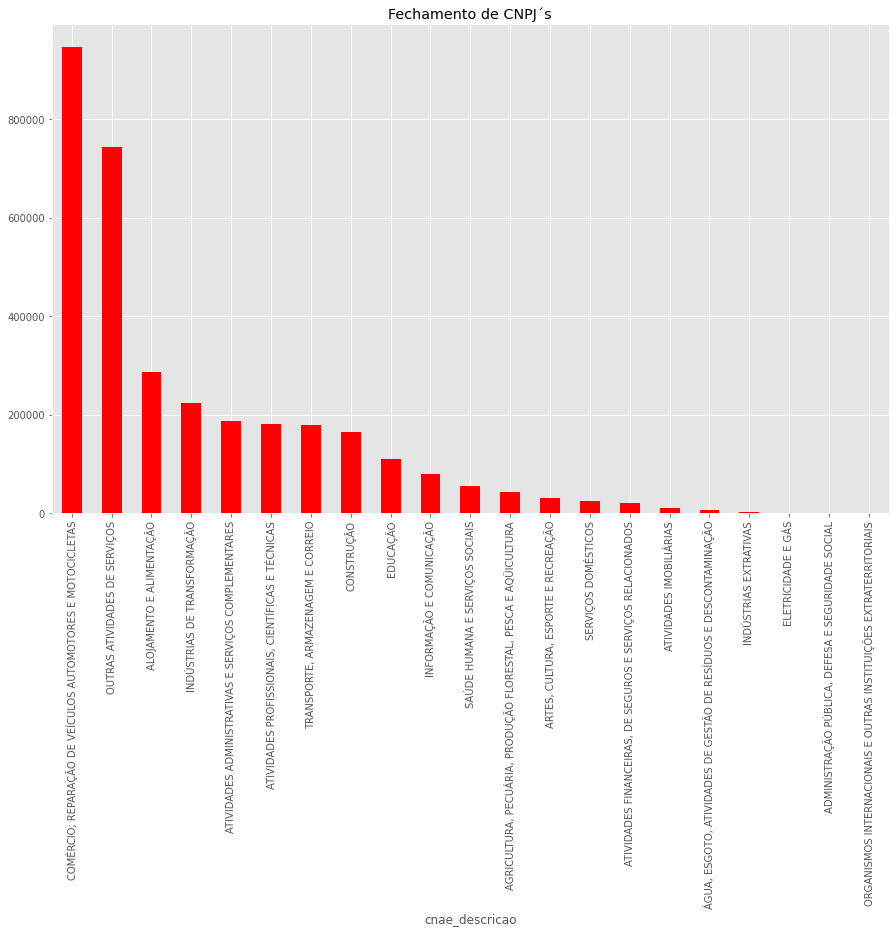

In [97]:
cnae.plot(kind='bar', figsize=(15,9), color='r', title='Fechamento de CNPJ´s')

In [98]:
cnae=cnpj_final_fechadas_total.groupby('cnae_principal')['cnae_principal'].count() # Agrupamento de CNAE´s principais para identificação de possíveis disparidades

In [99]:
cnae = cnae.sort_values(ascending=False)

In [100]:
cnae_maiores = cnae [0:30]

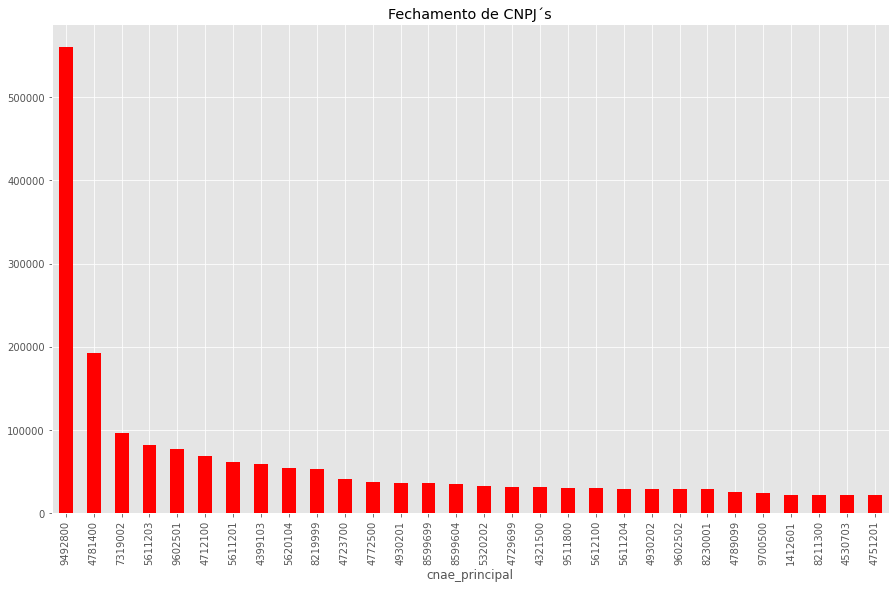

In [101]:
cnae_maiores.plot(kind='bar', figsize=(15,9), color='r', title='Fechamento de CNPJ´s')

### **CNAE - Análise das empresas ABERTAS no período**

In [102]:
cnae=cnpj_final_abertas_total.groupby('cnae_descricao')['cnae_descricao'].count() # Agrupamento de CNAE´s principais para identificação de possíveis disparidades

In [103]:
cnae = cnae.sort_values(ascending=False)

In [104]:
cnae

cnae_descricao
COMÉRCIO; REPARAÇÃO DE VEÍCULOS AUTOMOTORES E MOTOCICLETAS           2156387
OUTRAS ATIVIDADES DE SERVIÇOS                                         814499
ALOJAMENTO E ALIMENTAÇÃO                                              801742
INDÚSTRIAS DE TRANSFORMAÇÃO                                           662576
TRANSPORTE, ARMAZENAGEM E CORREIO                                     614371
CONSTRUÇÃO                                                            613958
ATIVIDADES PROFISSIONAIS, CIENTÍFICAS E TÉCNICAS                      535251
ATIVIDADES ADMINISTRATIVAS E SERVIÇOS COMPLEMENTARES                  487917
EDUCAÇÃO                                                              290710
SAÚDE HUMANA E SERVIÇOS SOCIAIS                                       216471
INFORMAÇÃO E COMUNICAÇÃO                                              191935
AGRICULTURA, PECUÁRIA, PRODUÇÃO FLORESTAL, PESCA E AQÜICULTURA        119487
SERVIÇOS DOMÉSTICOS                                          

In [105]:
cnae=cnpj_final_abertas_total.groupby('cnae_principal')['cnae_principal'].count() # Agrupamento de CNAE´s principais para identificação de possíveis disparidades

In [106]:
cnae = cnae.sort_values(ascending=False)

In [107]:
cnae_maiores = cnae [0:30]

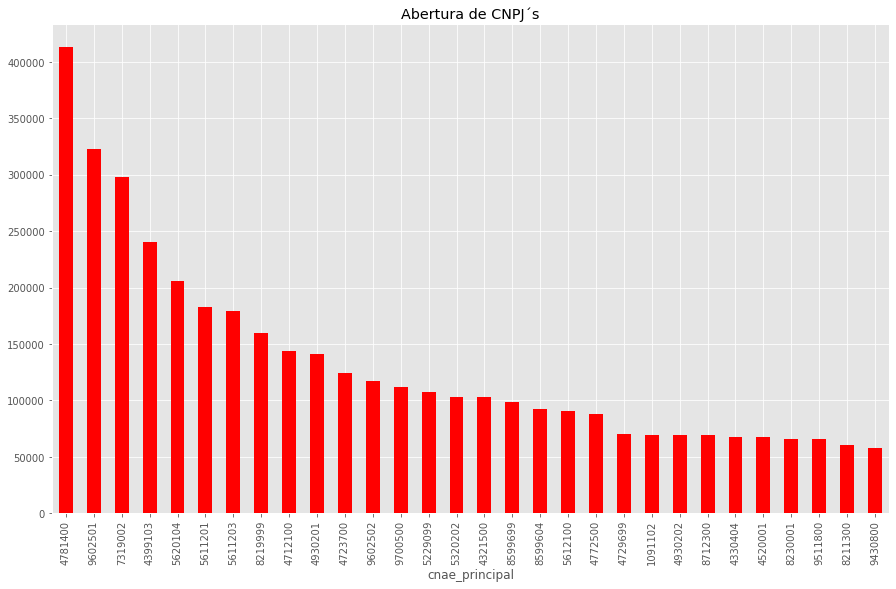

In [108]:
cnae_maiores.plot(kind='bar', figsize=(15,9), color='r', title='Abertura de CNPJ´s')

### **Eliminação das linhas**

Conforme descrito acima, após análise dos CNAE´s com alto número de ocorrências, eliminaremos as linhas onde o CNAE Principal é igual a "9492800" pois o mesmo representa "Atividades de organizações políticas", o qual não é foco deste estudo.

In [109]:
cnpj_final = cnpj_final[cnpj_final.cnae_principal != "9492800"]

In [110]:
cnpj_final.shape

(10534042, 31)

## **Tratamento da variável CAPITAL SOCIAL**

**Criação de uma coluna contendo as faixas dos valores para a variável CAPITAL SOCIAL, conforme tabela abaixo:**

Devido à alta  cardinalidade/valores únicos (número de elementos deste conjunto) dos dados, a coluna "capital_social" será transformada em uma coluna com faixas de valores, conforme tabela abaixo:


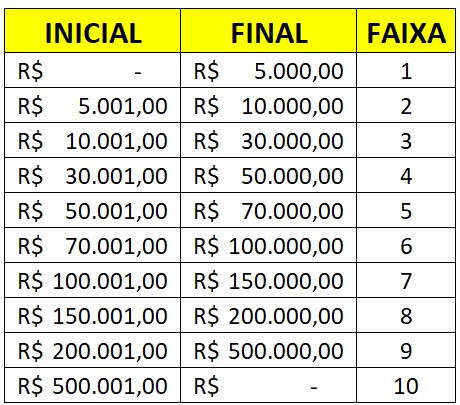



In [111]:
cnpj_final['capital_social'].describe()

count     10534042
unique       54293
top        1000.00
freq       1994134
Name: capital_social, dtype: object

In [112]:
cnpj_final['capital_social'] = cnpj_final['capital_social'].astype(float)

In [113]:
cnpj_final['capital_social_faixas']=pd.cut(

   cnpj_final['capital_social'],

   bins=[-1, 5000, 10000, 30000, 50000, 70000, 100000, 150000, 200000, 500000, sys.maxsize],

   labels=['1', '2', '3', '4', '5','6','7','8','9','10']
)

## **Tratamento das variáveis de COVID**

**Criação de uma coluna contendo as faixas dos valores para as variáveis CASOS ACUMULADOS E ÓBITOS ACUMULADOS, conforme tabela abaixo:** Devido a alta  cardinalidade/valores únicos (número de elementos deste conjunto) dos dados, as colunas "casos_acumulados_porcentagem_covid" e "obitos_acumulados_porcentagem_covid" serão transformadas duas outras colunas com faixas de valores, conforme tabela abaixo:

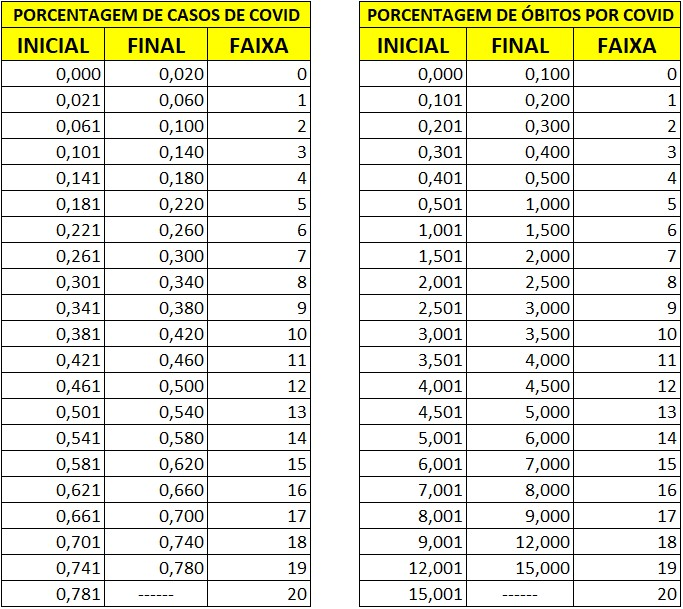

In [114]:
cnpj_final['casos_acumulados_porcentagem_covid_faixas']=pd.cut(
   cnpj_final['casos_acumulados_porcentagem_covid'],
   bins=[-1, 0.1, 0.2, 0.3, 0.4, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 6.0, 7.0, 8.0, 9.0, 12.0, 15.0, sys.maxsize],
     labels=['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20'])

cnpj_final['obitos_acumulados_porcentagem_covid_faixas']=pd.cut(
   cnpj_final['obitos_acumulados_porcentagem_covid'],
   bins=[-1, 0.02, 0.06, 0.1, 0.14, 0.18, 0.22, 0.26, 0.3, 0.34, 0.38, 0.42, 0.46, 0.5, 0.54, 0.58, 0.62, 0.66, 0.7, 0.74, 0.78, sys.maxsize],
     labels=['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20'])

## **Tratamento das variáveis de IDH**

Devido a alta  cardinalidade/valores únicos (número de elementos deste conjunto) dos dados, essa coluna será transformada em uma coluna com faixas de valores, conforme tabela abaixo:

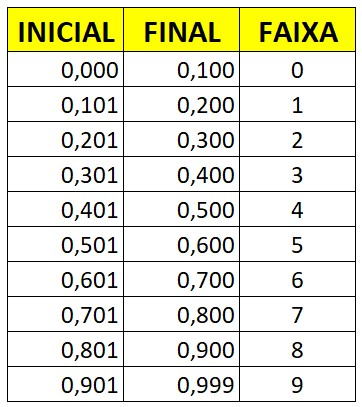

In [115]:
cnpj_final['idh_municipio'] = cnpj_final['idh_municipio'].astype(float)
cnpj_final['idh_educacao'] = cnpj_final['idh_educacao'].astype(float)
cnpj_final['idh_longevidade'] = cnpj_final['idh_longevidade'].astype(float)
cnpj_final['idh_renda'] = cnpj_final['idh_renda'].astype(float)

In [116]:
cnpj_final['idh_municipios_faixas']=pd.cut(
   cnpj_final['idh_municipio'],
   bins=[0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, sys.maxsize],
     labels=['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'])

cnpj_final['idh_educacao_municipios_faixas']=pd.cut(
   cnpj_final['idh_educacao'],
   bins=[0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, sys.maxsize],
     labels=['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'])

cnpj_final['idh_longevidade_municipios_faixas']=pd.cut(
   cnpj_final['idh_longevidade'],
   bins=[0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, sys.maxsize],
     labels=['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'])

cnpj_final['idh_renda_municipios_faixas']=pd.cut(
   cnpj_final['idh_renda'],
   bins=[0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, sys.maxsize],
     labels=['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'])

## **Tratamento da variável PIB PER CAPITA**

*   PIB PER CAPITA : Valor do PIB municipal per capita, calculado como sendo o PIB Municipal do ano dividido pela população do mesmo ano. Os valores são apresentados em reais correntes, não sendo aplicado nenhum deflator ou fator de correção.

Devido a alta  cardinalidade/valores únicos (número de elementos deste conjunto) dos dados, a coluna "PIB PER CAPITA" será transformada em uma coluna com faixas de valores, conforme tabela abaixo:

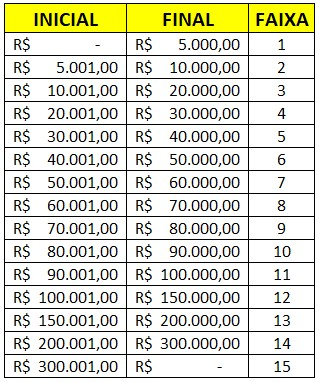

In [117]:
cnpj_final['pib_per_capita'] = cnpj_final['pib_per_capita'].astype(float)

In [118]:
cnpj_final['pib_per_capita_faixas']=pd.cut(

   cnpj_final['pib_per_capita'],

   bins=[-1, 5000, 10000, 20000, 30000, 40000, 50000, 60000, 70000, 80000, 90000, 100000, 150000, 200000, 300000, sys.maxsize],

   labels=['1', '2', '3', '4', '5','6','7','8','9','10','11','12','13','14','15']
)

# **Gravação do Dataset**

In [119]:
cnpj_final = cnpj_final[[
    'cnpj_basico', 'cnpj_ordem', 'cnpj_dv', 'matriz_filial',  'capital_social', 'capital_social_faixas',
    'codigo_situacao_cadastral',  
    'data_inicio_atividade', 'data_situacao_cadastral',  'data_situacao_cadastral_ano_mes', 'situacao_cadastral_target',
    'codigo_ibge', 'codigo_municipio_siafi', 'descricao_municipio',  'regiao',  'estado', 'interior_metropolitana',
    'casosAcumulado_covid',  'obitosAcumulado_covid',  'casos_acumulados_porcentagem_covid',  'obitos_acumulados_porcentagem_covid', 'casos_acumulados_porcentagem_covid_faixas', 'obitos_acumulados_porcentagem_covid_faixas',
    'idh_municipio', 'idh_educacao', 'idh_longevidade','idh_renda', 'idh_municipios_faixas', 'idh_educacao_municipios_faixas', 'idh_longevidade_municipios_faixas', 'idh_renda_municipios_faixas',
    'populacaoTCU2019', 'pib', 'pib_per_capita', 'pib_per_capita_faixas',
    'cnae_principal',  'cnae_divisao',  'cnae_secao',  'cnae_descricao'
]]

In [120]:
cnpj_final.shape

(10534042, 39)

In [121]:
cnpj_final.dtypes

cnpj_basico                                     object
cnpj_ordem                                      object
cnpj_dv                                         object
matriz_filial                                   object
capital_social                                 float64
capital_social_faixas                         category
codigo_situacao_cadastral                       object
data_inicio_atividade                           object
data_situacao_cadastral                         object
data_situacao_cadastral_ano_mes                 object
situacao_cadastral_target                       object
codigo_ibge                                      int64
codigo_municipio_siafi                           int64
descricao_municipio                             object
regiao                                          object
estado                                          object
interior_metropolitana                           int64
casosAcumulado_covid                           float64
obitosAcum

In [122]:
cnpj_final.head()

,cnpj_basico,cnpj_ordem,cnpj_dv,matriz_filial,capital_social,capital_social_faixas,codigo_situacao_cadastral,data_inicio_atividade,data_situacao_cadastral,data_situacao_cadastral_ano_mes,situacao_cadastral_target,codigo_ibge,codigo_municipio_siafi,descricao_municipio,regiao,estado,interior_metropolitana,casosAcumulado_covid,obitosAcumulado_covid,casos_acumulados_porcentagem_covid,obitos_acumulados_porcentagem_covid,casos_acumulados_porcentagem_covid_faixas,obitos_acumulados_porcentagem_covid_faixas,idh_municipio,idh_educacao,idh_longevidade,idh_renda,idh_municipios_faixas,idh_educacao_municipios_faixas,idh_longevidade_municipios_faixas,idh_renda_municipios_faixas,populacaoTCU2019,pib,pib_per_capita,pib_per_capita_faixas,cnae_principal,cnae_divisao,cnae_secao,cnae_descricao
0,29880797,0001,40,1,3500.0,1,08,20180308,20200507,202005,1,3170206,5403,UBERLANDIA,Sudeste,MG,0,199.0,9.0,0.029,0.001,0,0,0.789,0.716,0.776,0.885,7,7,7,8,691305,37442790976.00,54801.25,7,9511800,95,s,OUTRAS ATIVIDADES DE SERVIÇOS
1,28424384,0001,99,1,3000.0,1,08,20170815,20200610,202006,1,3304557,6001,RIO DE JANEIRO,Sudeste,RJ,1,38960.0,4716.0,0.580,0.070,5,2,0.799,0.719,0.840,0.845,7,7,8,8,6718903,364052058232.00,54426.08,7,8599604,85,p,EDUCAÇÃO
2,29881212,0001,07,1,10000.0,2,08,20180308,20201214,202012,1,4101200,7421,ANTONINA,Sul,PR,0,1038.0,26.0,5.469,0.137,14,3,0.687,0.564,0.686,0.838,6,5,6,8,18980,538253205.00,28312.72,4,4744099,47,g,COMÉRCIO; REPARAÇÃO DE VEÍCULOS AUTOMOTORES E ...
3,29881383,0001,36,1,5000.0,1,08,20180308,20210514,202105,1,3510500,6311,CARAGUATATUBA,Sudeste,SP,0,13239.0,354.0,10.893,0.291,18,7,0.759,0.705,0.735,0.845,7,7,7,8,121532,3325920049.00,27802.88,4,1091102,10,c,INDÚSTRIAS DE TRANSFORMAÇÃO
4,29881861,0001,08,1,100000.0,6,08,20180308,20200921,202009,1,4314902,8801,PORTO ALEGRE,Sul,RS,1,24446.0,926.0,1.648,0.062,7,2,0.805,0.702,0.867,0.857,8,7,8,8,1483771,77134613181.00,52149.66,7,8630504,86,q,SAÚDE HUMANA E SERVIÇOS SOCIAIS


In [123]:
cnpj_final.to_csv('/content/drive/MyDrive/TCC - PUC/dataset_final.csv', index=False, sep=';', encoding='ISO-8859-1')